In [1]:
import sys
sys.path.insert(0, '../../')   # для обращения к родительской директории
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# для отрисовки временного ряда с разметкой неисправностей
from notebook.utils import plot_failure

In [4]:
def drop_rows(X, y, df):
    '''Функция для исключения нужных строк из X и y по датам
    df - датафрейм с данными, которые нужно удалить'''

    rows = []
    start_col = df['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ']
    end_col = df['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ']

    for start, end in zip(start_col, end_col):
        indexes = X.loc[(X.index >= start) & (X.index <= end)].index
        rows.extend(indexes)
    
    return X.drop(rows), y.drop(rows)

In [5]:
#ЭКСГАУСТЕР №5
n = 5

In [6]:
X_columns = [
       'ЭКСГАУСТЕР 5. ТОК РОТОРА 1', 'ЭКСГАУСТЕР 5. ТОК РОТОРА 2',
       'ЭКСГАУСТЕР 5. ТОК СТАТОРА', 'ЭКСГАУСТЕР 5. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ',
       'ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1',
       'ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2',
       'ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3',
       'ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4',
       'ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ',
       'ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ',
       'ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 1',
       'ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 2',
       'ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 3',
       'ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.',
       'ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 4',
       'ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.']

In [7]:
y_columns = [
    'Y_ЭКСГАУСТЕР А/М №5_МАСЛООХЛАДИТЕЛЬ  М-05-1 ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_КОРПУС ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ЗАДВИЖКА ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ПОДШИПНИК ОПОРНЫЙ №2',
    'Y_ЭКСГАУСТЕР А/М №5_ПОДШИПНИК ОПОРНО-УПОРНЫЙ ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_МАСЛОНАСОС ШЕСТЕРЕНЧАТЫЙ (РЕЗ.) ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ВК 310С ВИБРОПРЕОБРАЗОВАТЕЛЬ ЭКСГ.№5 Т.1',
    'Y_ЭКСГАУСТЕР А/М №5_ВК 310С ВИБРОПРЕОБРАЗОВАТЕЛЬ ЭКСГ.№5 Т.3',
    'Y_ЭКСГАУСТЕР А/М №5_ЭЛЕКТРООБОРУДОВАНИЯ ЭКСГАУСТЕРА №5',
    'Y_ЭКСГАУСТЕР А/М №5_ВК 310С ВИБРОПРЕОБРАЗОВАТЕЛЬ ЭКСГ.№5 Т.2',
    'Y_ЭКСГАУСТЕР А/М №5_ПОДШИПНИК ОПОРНЫЙ №1',
    'Y_ЭКСГАУСТЕР А/М №5_РЕДУКТОР ГАЗ. ЗАДВИЖКИ ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ТИРИСТ. ВОЗБУДИТЕЛЬ ВТ-РЭМ-400 ЭКСГ5 ВУ1',
    'Y_ЭКСГАУСТЕР А/М №5_ЗАПОРНАЯ АРМАТУРА ЭКСГАУСТЕРА №5',
    'Y_ЭКСГАУСТЕР А/М №5_МАСЛОПРОВОДЫ ЭКСГАУСТЕРА №5',
    'Y_ЭКСГАУСТЕР А/М №5_ГСМ ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ЭКСГАУСТЕР А/М №5',
    'Y_ЭКСГАУСТЕР А/М №5_ТСМТ-101-010-50М-80 ТЕРМОПРЕОБР.МАСЛО',
    'Y_ЭКСГАУСТЕР А/М №5_ТР-Р ТМ-4000-10/6 ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_КЛ1 ТР№5 ДО ЭД ЭКСГАУСТЕРА №5',
    'Y_ЭКСГАУСТЕР А/М №5_КЛ2 ТР№5 ДО ЭД ЭКСГАУСТЕРА №5',
    'Y_ЭКСГАУСТЕР А/М №5_МАСЛОНАСОС РАБОЧИЙ ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_РОТОР ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_МЕТРАН-100 ДАТЧИКИ ДАВЛЕНИЯ ЭКСГ.№5',
    'Y_ЭКСГАУСТЕР А/М №5_ДВИГАТЕЛЬ ПУСКОВОГО МАСЛОНАСОСА ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ГАЗОВАЯ ЗАДВИЖКА ЭКСГАУСТЕРА А/М №5',
    'Y_ЭКСГАУСТЕР А/М №5_КОЖУХ МУФТЫ ЭКСГ. №5',
    'Y_ЭКСГАУСТЕР А/М №5_ТИРИСТ. ВОЗБУДИТЕЛЬ ВТ-РЭМ-400 ЭКСГ5 ВУ2',
    'Y_ЭКСГАУСТЕР А/М №5_ТСМТ-101-010-50М-400 ТЕРМОПР.ПОДШ.Т.2',
    'Y_ЭКСГАУСТЕР А/М №5_ДВИГАТЕЛЬ РЕЗЕРВНОГО МАСЛОНАСОСА ЭКСГ.№5',
    'Y_ЭКСГАУСТЕР А/М №5_ТСМТ-101-010-50М-200 ТЕРМОПР.ПОДШ.Т.3',
    'Y_ЭКСГАУСТЕР А/М №5_ЭКСГАУСТЕР Н-8000 А/М №5'
]

In [8]:
X = pd.read_parquet('../../data/X_train.parquet', columns=X_columns)
y = pd.read_parquet('../../data/y_train.parquet', columns=y_columns)

messages = pd.read_excel('../../data/processed/messages_processed.xlsx')
messages.shape

(970, 10)

Будем считать, что при остановке эксгаустера этот период необходимо исключить из рассмотрения,  
если он не относится к целевой переменной и не прогнозируется M1

In [9]:
# Исключение всех M1 для данного эксгаустера

M1 = messages[messages['ВИД_СООБЩЕНИЯ']=='M1']
M1_ex_n = M1[M1['ИМЯ_МАШИНЫ']==f'ЭКСГАУСТЕР А/М №{n}']
print(f'Количество М1 для эксгаустера №{n} -', len(M1_ex_n))

# Исключаем нужные строки из X и y по датам
X, y = drop_rows(X, y, M1_ex_n)

Количество М1 для эксгаустера №5 - 24


In [10]:
print(X.shape)
print(y.shape)

(9289387, 16)
(9289387, 34)


In [11]:
# Количество аварий M3 и первая дата начала M3 без завершения по техместам
M3 = messages[messages['ВИД_СООБЩЕНИЯ']=='M3']
M3_ex_n = M3[M3['ИМЯ_МАШИНЫ']==f'ЭКСГАУСТЕР А/М №{n}']

endless_fail = M3_ex_n[M3_ex_n['ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ'].isna()].copy()  #без сообщения о завершении

pd.DataFrame({
    'M3': M3_ex_n['НАЗВАНИЕ_ТЕХ_МЕСТА'].value_counts(),
    'First_NaT': endless_fail.drop_duplicates(subset=['НАЗВАНИЕ_ТЕХ_МЕСТА'])\
                .set_index('НАЗВАНИЕ_ТЕХ_МЕСТА')[['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ']].squeeze()
    }).sort_values(by='M3', ascending=False)

,M3,First_NaT
НАЗВАНИЕ_ТЕХ_МЕСТА,,
ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5,25,2021-12-12 11:27:00
ЗАДВИЖКА ЭКСГ. №5,22,2021-11-25 14:01:00
РЕДУКТОР ГАЗ. ЗАДВИЖКИ ЭКСГ. №5,15,2019-08-13 16:38:00
КОРПУС ЭКСГ. №5,12,2021-07-13 15:30:00
ТР-Р ТМ-4000-10/6 ЭКСГ. №5,11,2021-01-14 19:49:50
ПОДШИПНИК ОПОРНЫЙ №1,11,NaT
ПОДШИПНИК ОПОРНО-УПОРНЫЙ ЭКСГ. №5,10,NaT
МАСЛООХЛАДИТЕЛЬ М-05-1 ЭКСГ. №5,9,NaT
ПОДШИПНИК ОПОРНЫЙ №2,7,2019-09-30 17:17:30


In [12]:
# Возьмем некоторые из столбцов y с наибольшим числом M3, преимущественно имеющих сообщения о завершении
y_list = [
    'ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5',
    'ЗАДВИЖКА ЭКСГ. №5',
    'КОРПУС ЭКСГ. №5',
    ]

y = y[[f'Y_ЭКСГАУСТЕР А/М №{n}_{column}' for column in y_list]]
print("Пропущенные значения в y:", y.isna().sum().sum())
y.head()

Пропущенные значения в y: 0


,Y_ЭКСГАУСТЕР А/М №5_ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5,Y_ЭКСГАУСТЕР А/М №5_ЗАДВИЖКА ЭКСГ. №5,Y_ЭКСГАУСТЕР А/М №5_КОРПУС ЭКСГ. №5
DT,,,
2019-01-16 13:21:00,0.0,0.0,0.0
2019-01-16 13:21:10,0.0,0.0,0.0
2019-01-16 13:21:20,0.0,0.0,0.0
2019-01-16 13:21:30,0.0,0.0,0.0
2019-01-16 13:21:40,0.0,0.0,0.0


In [13]:
print(X.shape)
print(y.shape)

(9289387, 16)
(9289387, 3)


M0 (2077748,)
M1 (0,)
M3 (7211639,)


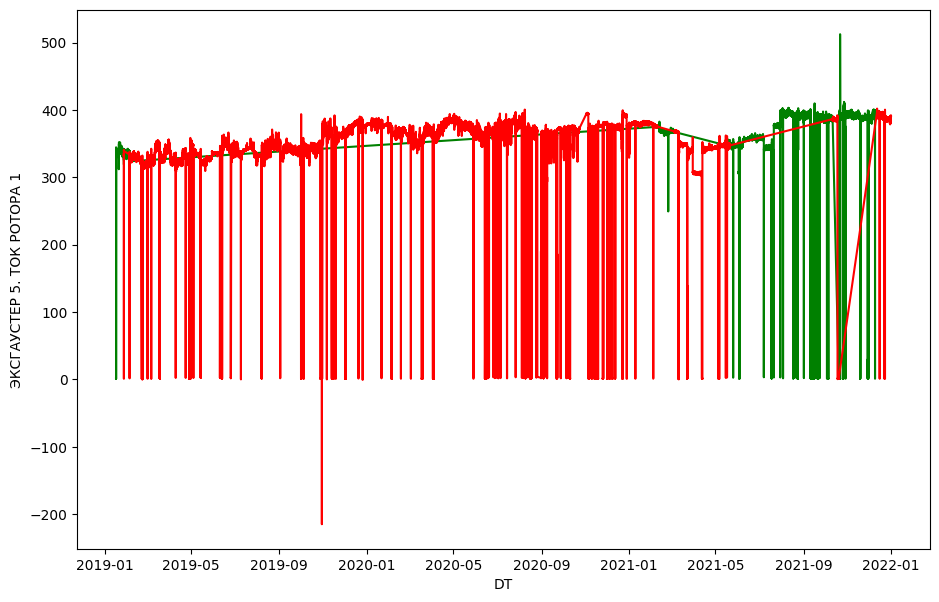

In [13]:
plot_failure(X[f'ЭКСГАУСТЕР {n}. ТОК РОТОРА 1'], y.iloc[:,0])

Оставляем начальный интервал X и y до первого сообщения о поломке, не имеющей даты устранения

In [14]:
endless_fail = endless_fail[endless_fail['НАЗВАНИЕ_ТЕХ_МЕСТА'].apply(lambda x: x in y_list)]

if len(endless_fail) == 0:
    print('Все неисправности M3 содержат дату устранения')
print(endless_fail.shape)
endless_fail
# Находим первое такое сообщение для нужного эксгаустера

(5, 10)


,Unnamed: 0,МАШИНА,ИМЯ_МАШИНЫ,ТЕХ_МЕСТО,НАЗВАНИЕ_ТЕХ_МЕСТА,ВИД_СООБЩЕНИЯ,ОПИСАНИЕ,ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ,ДАТА_УСТРАНЕНИЯ_НЕИСПРАВНОСТИ,ТЕКСТ_ГРУППЫ_КОДОВ
816,1880,CH-AGP-AG2/003-005,ЭКСГАУСТЕР А/М №5,CH-AGP-AG2/003-005-001-001,КОРПУС ЭКСГ. №5,M3,Просос,2021-07-13 15:30:00,NaT,NaN
933,2119,AA2/002-006,ЭКСГАУСТЕР А/М №5,AA2/002-006-001-001,КОРПУС ЭКСГ. №5,M3,Ослабли болты,2021-11-25 13:22:00,NaT,NaN
937,2123,AA2/002-006,ЭКСГАУСТЕР А/М №5,AA2/002-006-003-003,ЗАДВИЖКА ЭКСГ. №5,M3,Отсутствует кожух,2021-11-25 14:01:00,NaT,NaN
948,2134,AA2/002-006,ЭКСГАУСТЕР А/М №5,AA2/002-006-001-005-003,ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5,M3,Требуется замена щёток,2021-12-12 11:27:00,NaT,NaN
961,2149,AA2/002-006,ЭКСГАУСТЕР А/М №5,AA2/002-006-003-003,ЗАДВИЖКА ЭКСГ. №5,M3,Деформация кожуха,2021-12-21 13:32:00,NaT,NaN


In [15]:
# Прибавляем M3_min = 8 минут к первому сообщению

if len(endless_fail) != 0:
    date = endless_fail['ДАТА_НАЧАЛА_НЕИСПРАВНОСТИ'].iloc[0] + pd.Timedelta(minutes=8)
    print(date)
else:
    date = len(X)
del endless_fail

# Обрезаем выборку (если есть NaT)
X_train = X[:date]
y_train = y[:date]

2021-07-13 15:38:00


In [16]:
print(X_train.shape)
print(y_train.shape)

(7809631, 16)
(7809631, 3)


In [17]:
# Пропуски
X_train.isna().sum() / X_train.shape[0]

ЭКСГАУСТЕР 5. ТОК РОТОРА 1                         0.057748
ЭКСГАУСТЕР 5. ТОК РОТОРА 2                         0.061202
ЭКСГАУСТЕР 5. ТОК СТАТОРА                          0.059882
ЭКСГАУСТЕР 5. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ             0.059865
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1    0.265634
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2    0.265495
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3    0.233607
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4    0.232013
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ          0.233410
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ       0.230865
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 1                  0.054730
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 2                  0.060416
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 3                  0.049442
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.     0.040204
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 4                  0.039923
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.     0.034370
dtype: float64

In [18]:
# Необходимо удалить отрицательные значения в X

if (X_train < 0).any().any():
    X_train = X_train[(X_train >= 0)]
    y_train = y_train.loc[X_train.index]
    print("Отрицательные значения удалены")

Отрицательные значения удалены


In [19]:
# Интерполируем пропуски
X_train = X_train.interpolate()

In [20]:
# Корреляции начального участка
corr = X_train.corrwith(y_train.iloc[:,2])
corr

ЭКСГАУСТЕР 5. ТОК РОТОРА 1                         0.022678
ЭКСГАУСТЕР 5. ТОК РОТОРА 2                         0.012942
ЭКСГАУСТЕР 5. ТОК СТАТОРА                         -0.006876
ЭКСГАУСТЕР 5. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ            -0.152739
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1    0.060724
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2    0.112779
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3    0.169489
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4    0.205437
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ          0.094502
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ       0.117191
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 1                  0.114760
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 2                  0.217592
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 3                  0.221236
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ.     0.138886
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 4                  0.098971
ЭКСГАУСТЕР 5. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ.     0.073834
dtype: float64

M0 (6236390,)
M1 (0,)
M3 (1573241,)


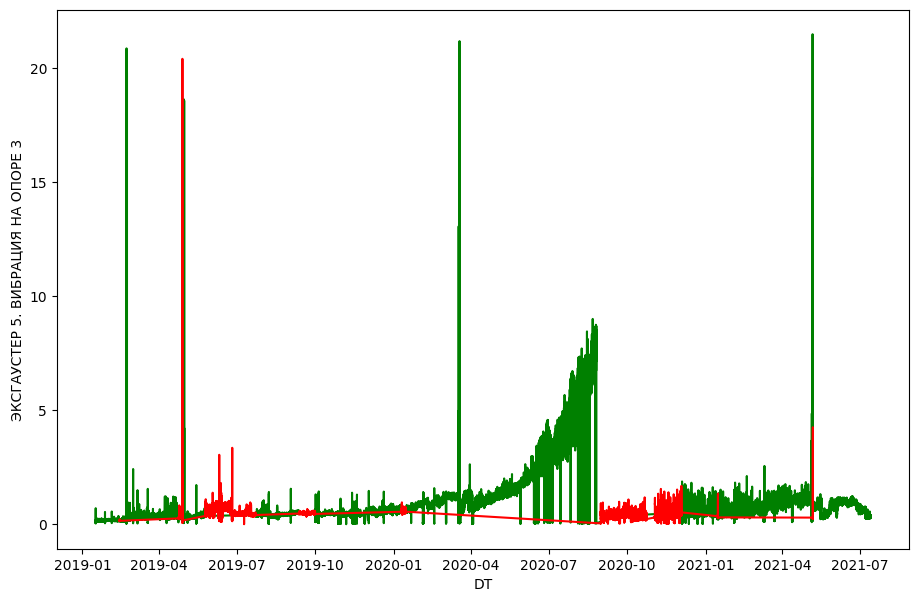

In [21]:
# График начального участка
plot_failure(X_train[f'ЭКСГАУСТЕР {n}. ВИБРАЦИЯ НА ОПОРЕ 3'], y_train.iloc[:,1])

M0 (4581757,)
M1 (0,)
M3 (3227874,)


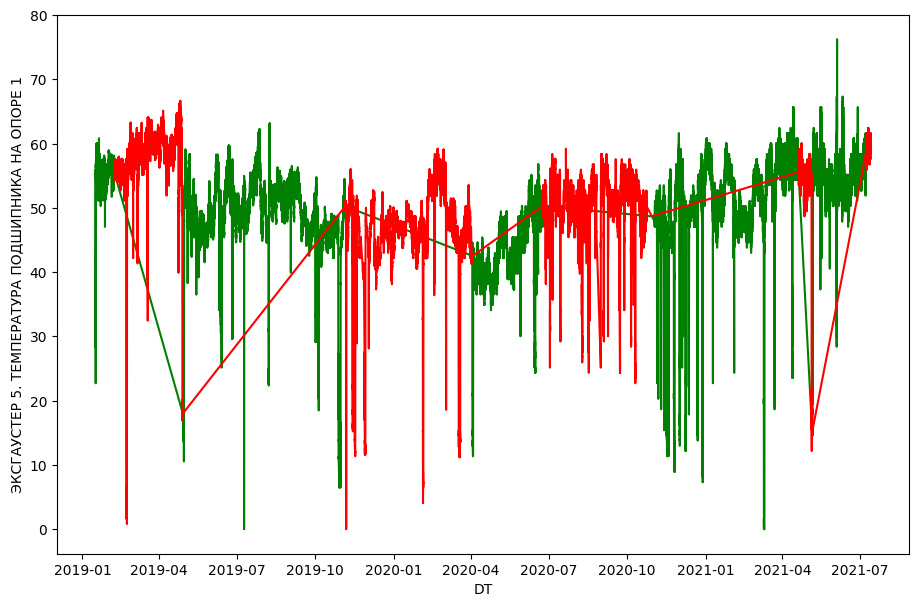

In [22]:
# График начального участка
plot_failure(X_train[f'ЭКСГАУСТЕР {n}. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1'], y_train.iloc[:,2])

In [21]:
y_train.replace(2, 1, inplace=True)
y_train.tail(2)

,Y_ЭКСГАУСТЕР А/М №5_ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №5,Y_ЭКСГАУСТЕР А/М №5_ЗАДВИЖКА ЭКСГ. №5,Y_ЭКСГАУСТЕР А/М №5_КОРПУС ЭКСГ. №5
DT,,,
2021-07-13 15:37:50,0.0,0.0,1.0
2021-07-13 15:38:00,0.0,0.0,1.0


In [22]:
X_train.to_parquet('../../data/processed/ex5_M3_X_all_for_y_2,3,4.parquet')
y_train.to_parquet('../../data/processed/ex5_M3_y_2,3,4.parquet') # нумерация "y" начиная c №1
type(y_train)

pandas.core.frame.DataFrame

In [25]:
def plot_distribution(X, y):
    '''Распределение значений c авариями и без.'''
                
    # Разделяем индексы по поломкам в y
    M0_indx = y.loc[(y == 0)].index   # без аварий
    M3_indx = y.loc[(y == 1)].index   # авария без простоя
    # Разделяем Х по поломкам
    M0 = X.loc[M0_indx]
    M3 = X.loc[M3_indx]
    
    print('M0', M0.shape)
    print('M3', M3.shape)
        
    for col_m0, col_m1 in zip(M0.columns, M3.columns):
        df = pd.DataFrame({ 'M0': M0[col_m0].reset_index(drop=True), 'M3': M3[col_m1].reset_index(drop=True) })
        sns.boxplot(df)
        plt.ylabel(col_m0)
        plt.show()

    plt.close('all')

M0 (839483, 16)
M3 (6970148, 16)


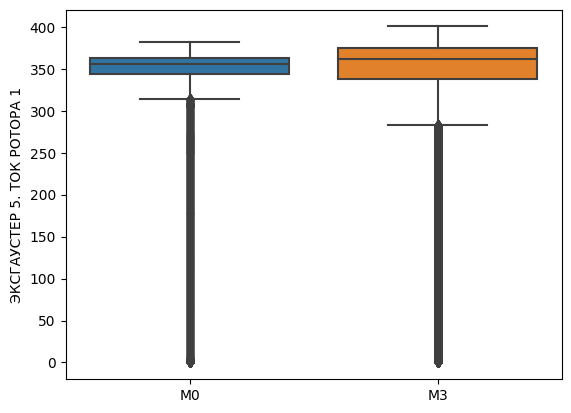

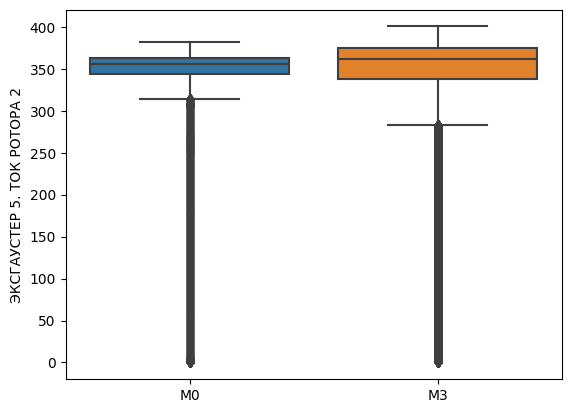

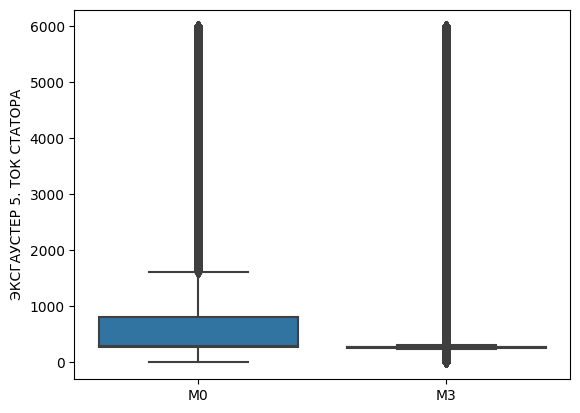

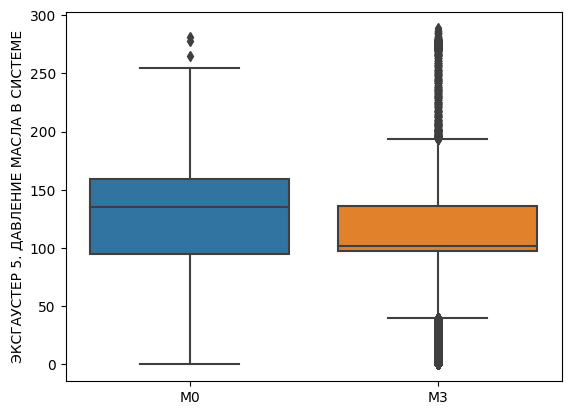

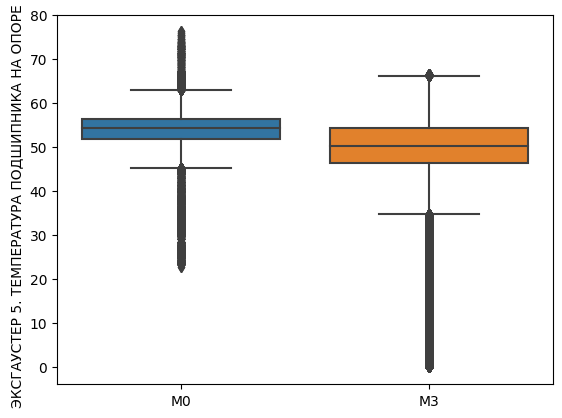

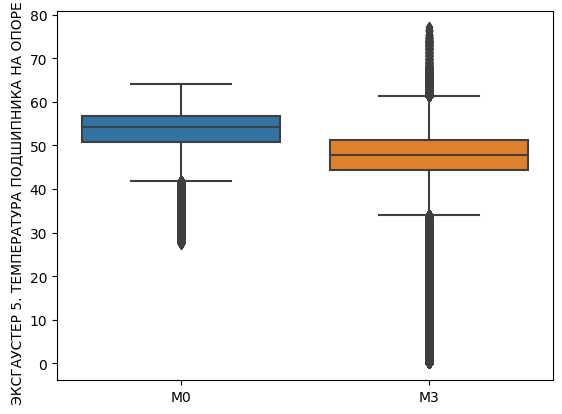

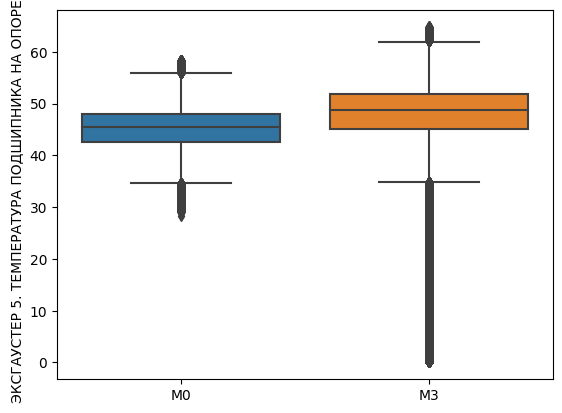

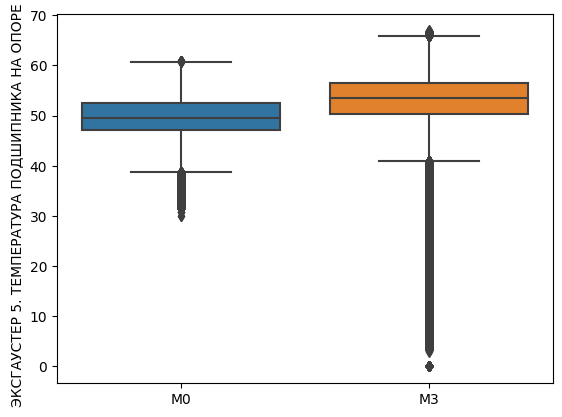

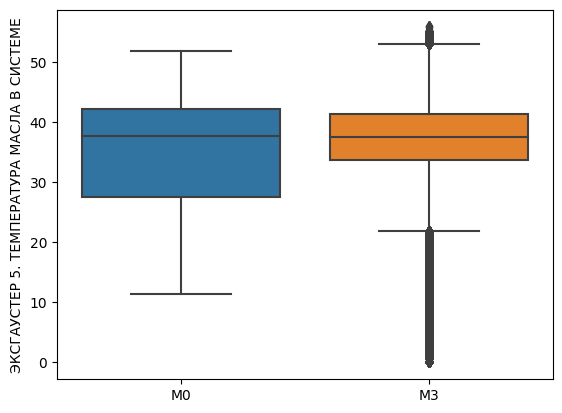

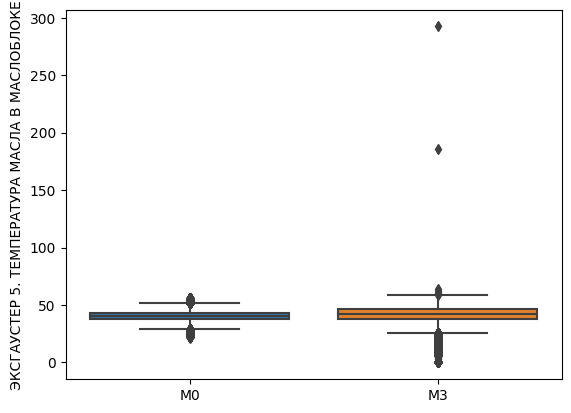

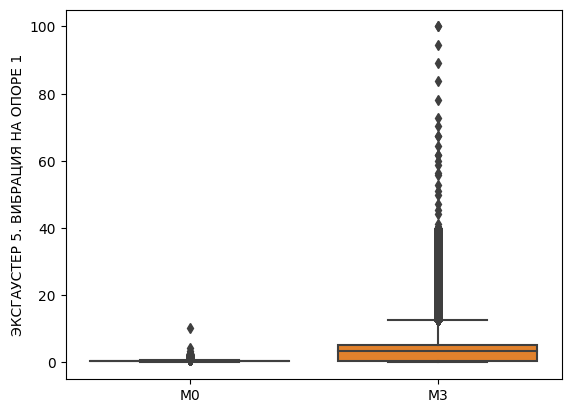

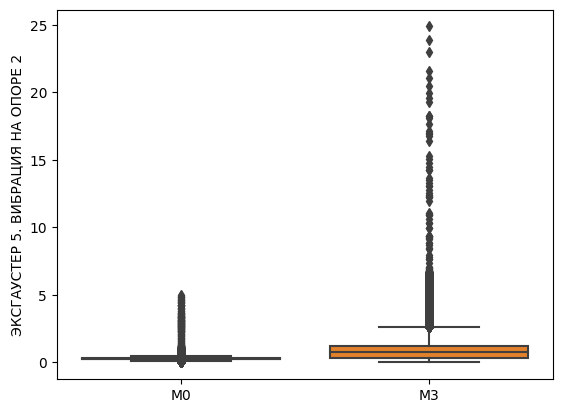

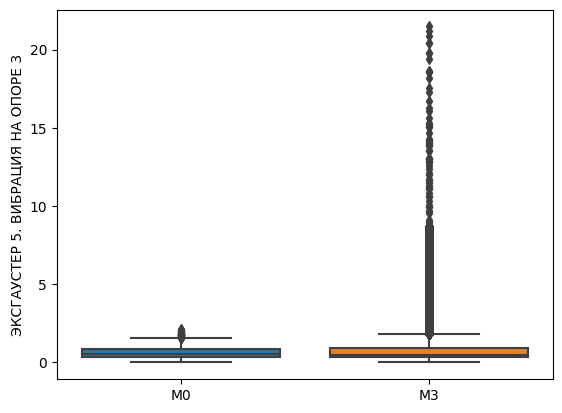

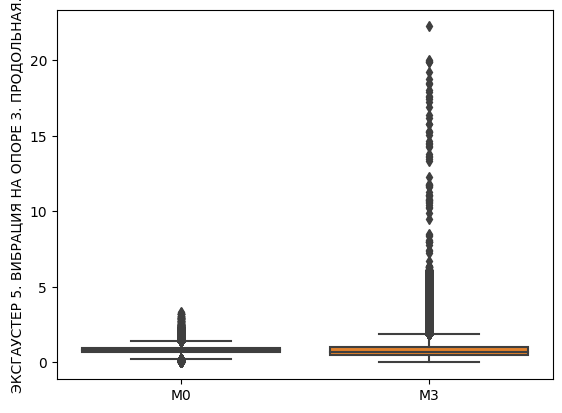

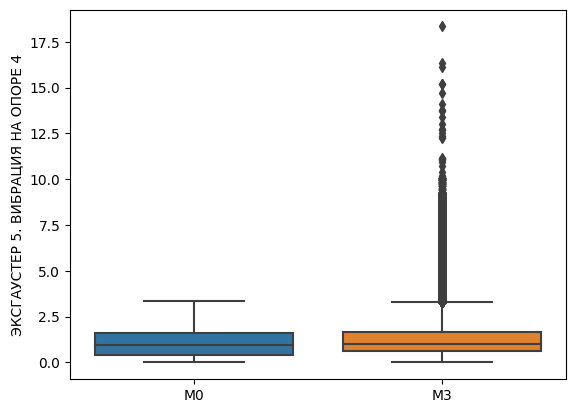

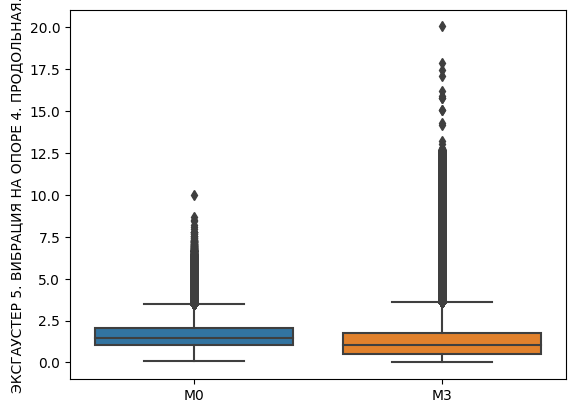

In [27]:
plot_distribution(X_train, y_train.iloc[:,0])

M0 (6236390, 16)
M3 (1573241, 16)


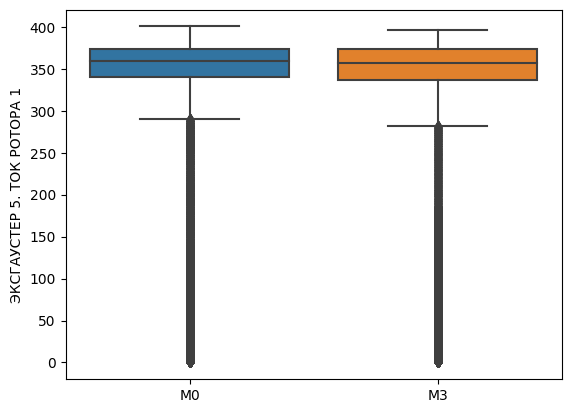

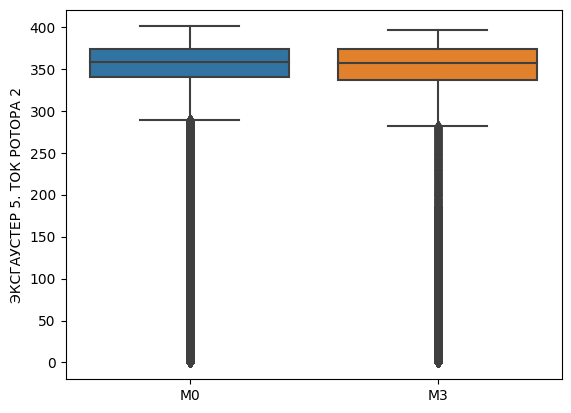

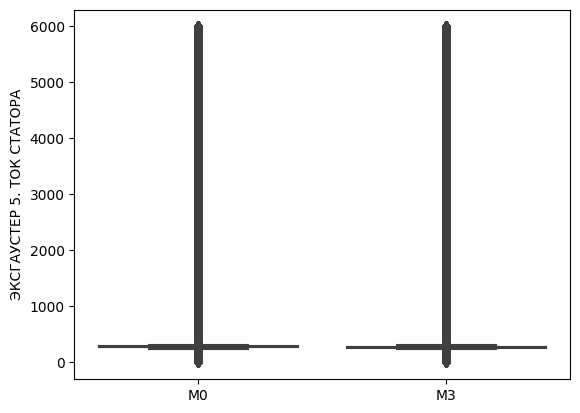

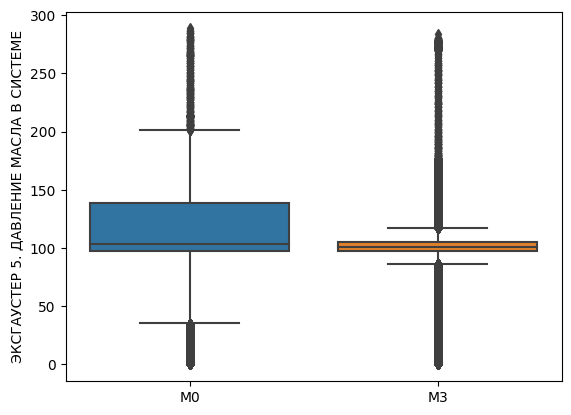

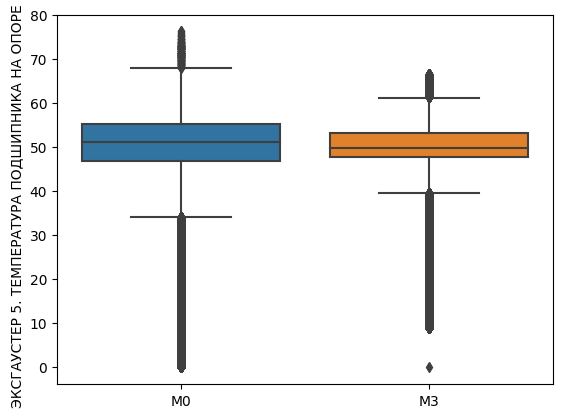

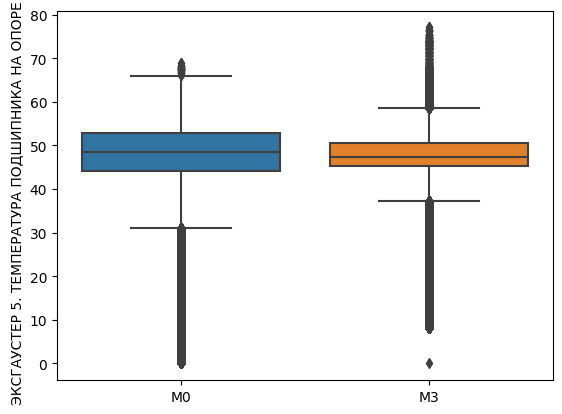

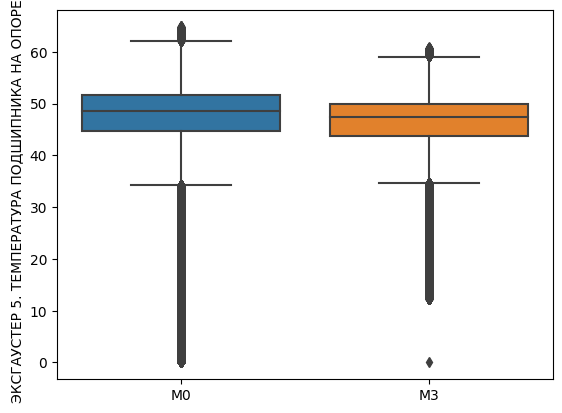

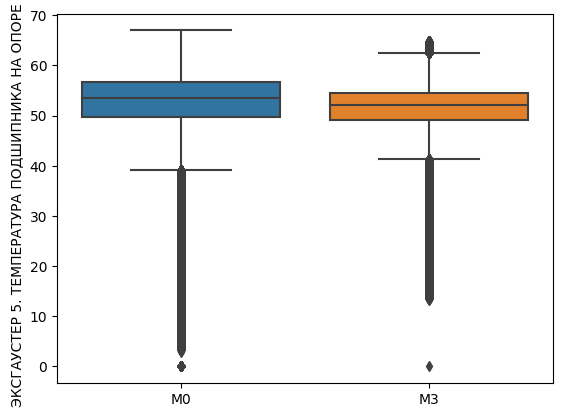

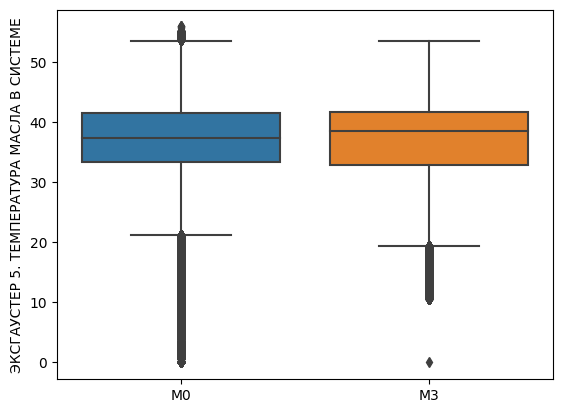

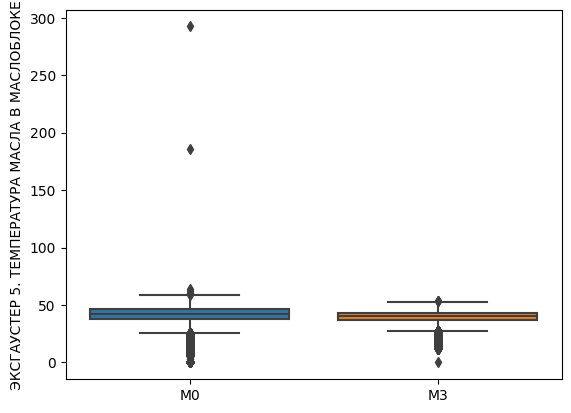

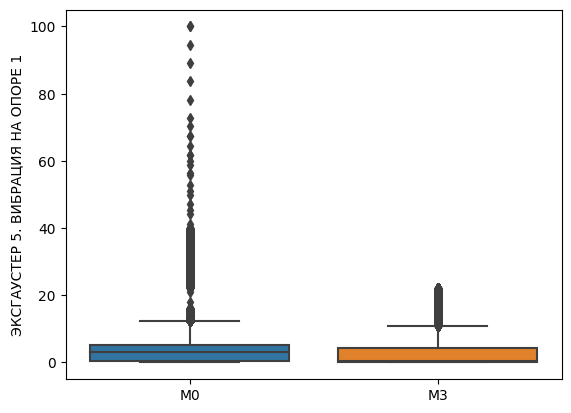

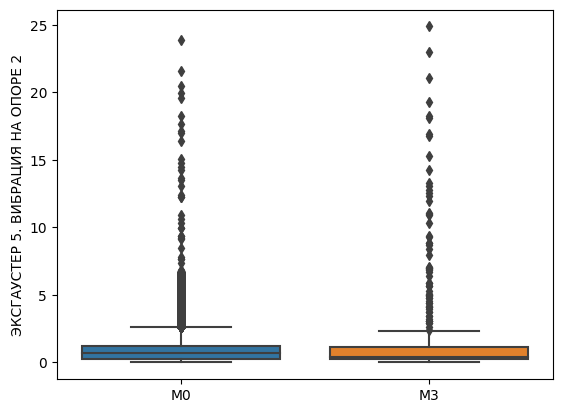

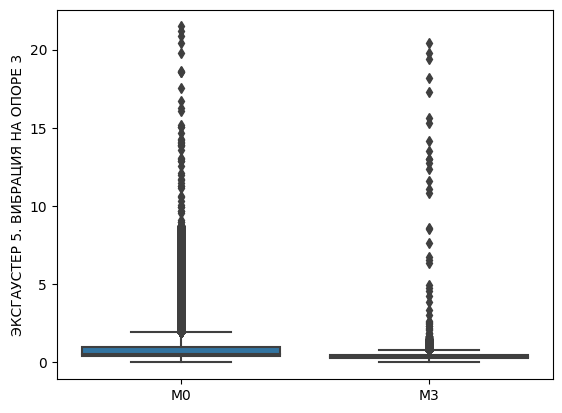

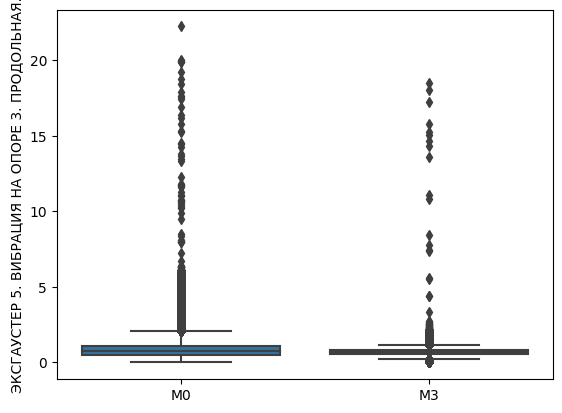

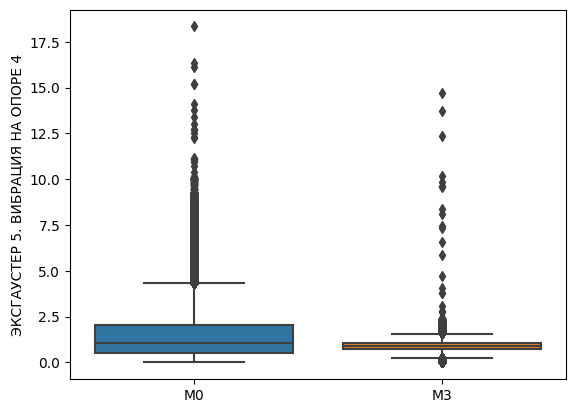

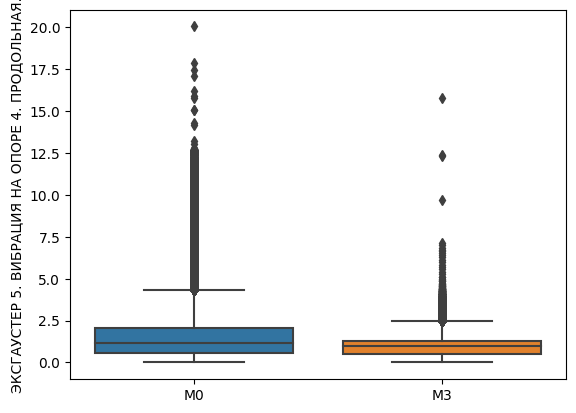

In [26]:
plot_distribution(X_train, y_train.iloc[:,1])

M0 (4581757, 16)
M3 (3227874, 16)


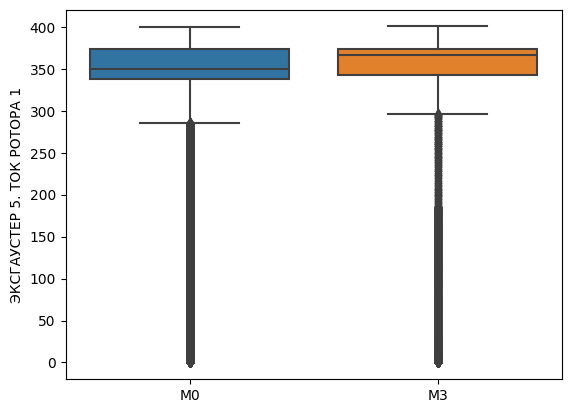

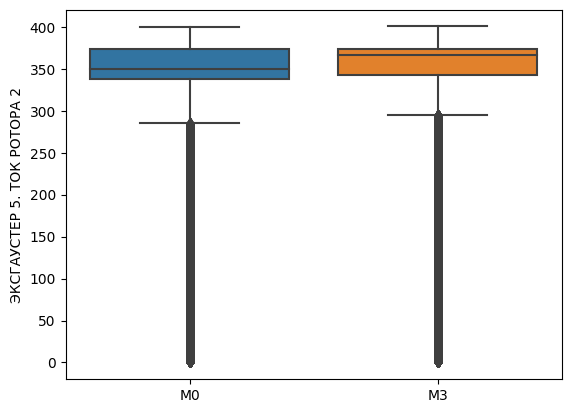

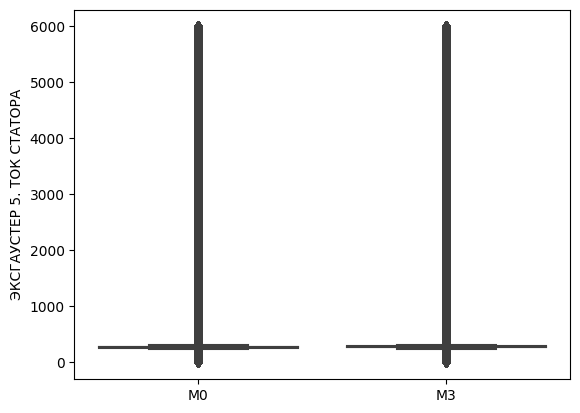

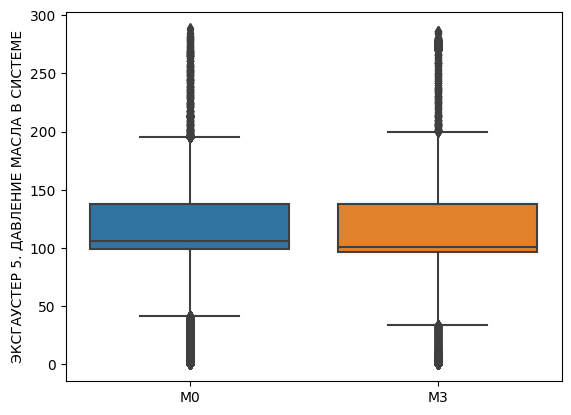

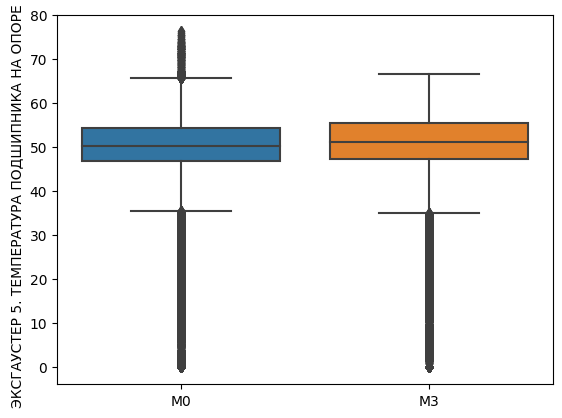

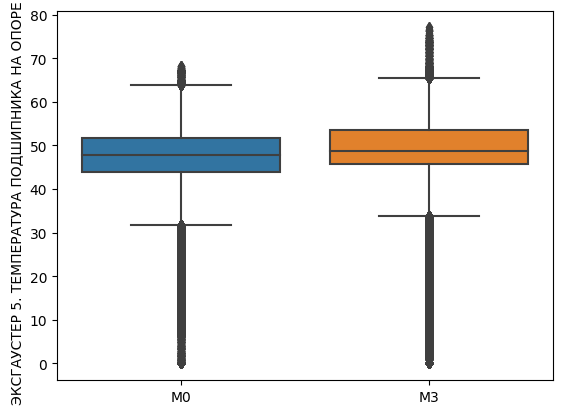

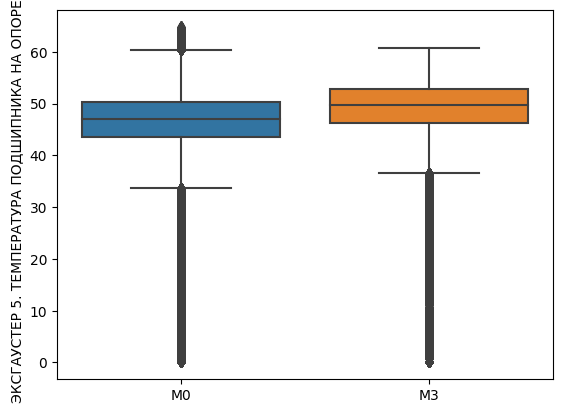

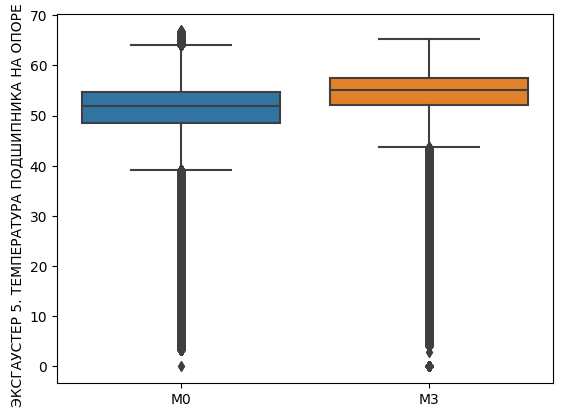

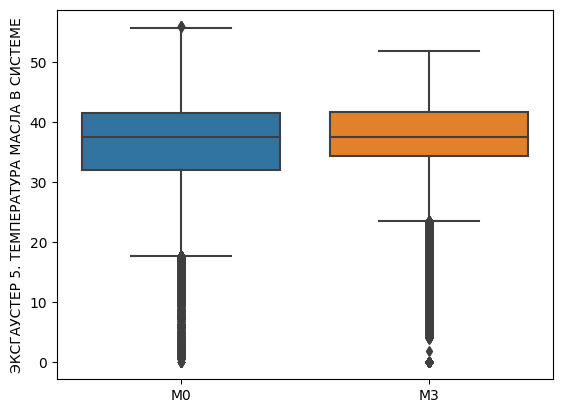

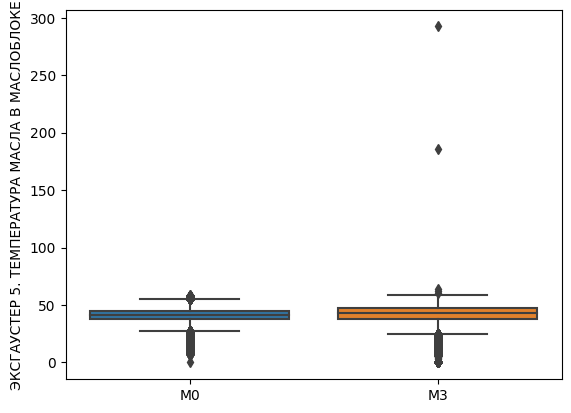

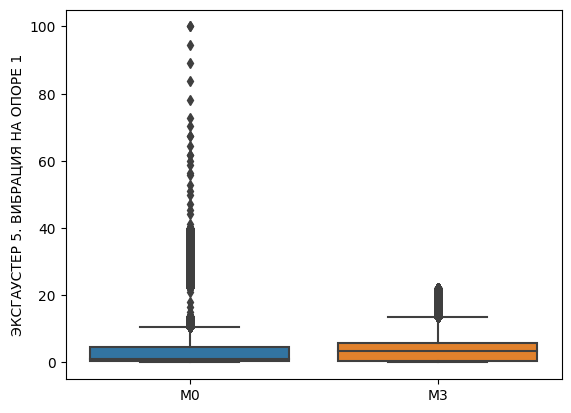

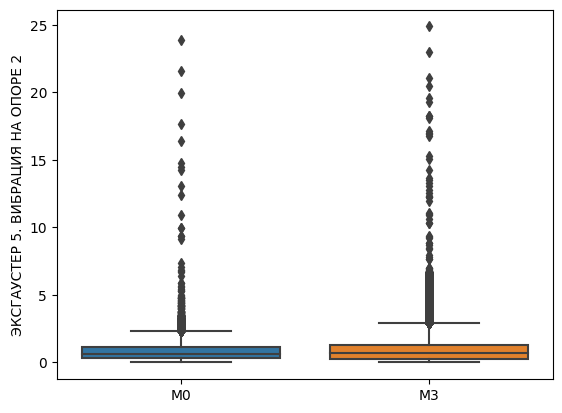

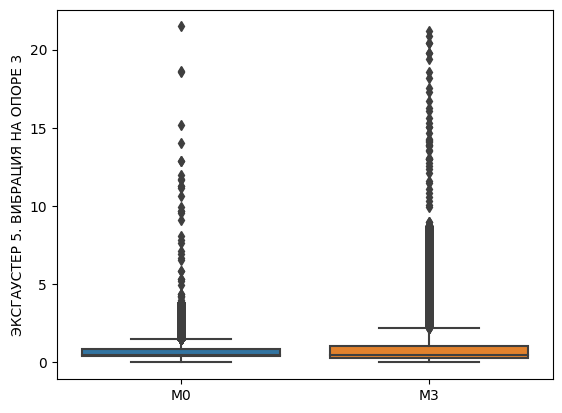

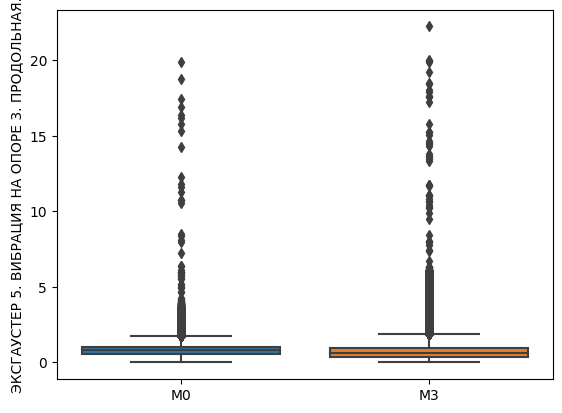

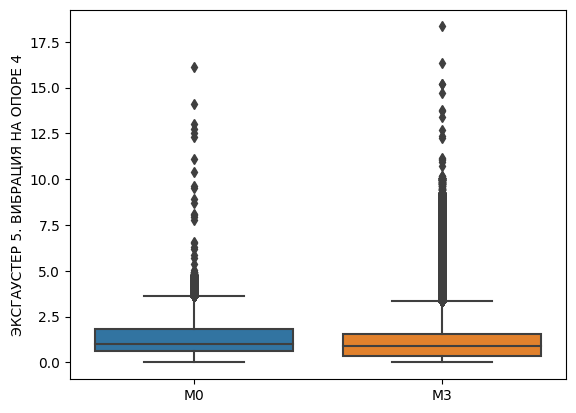

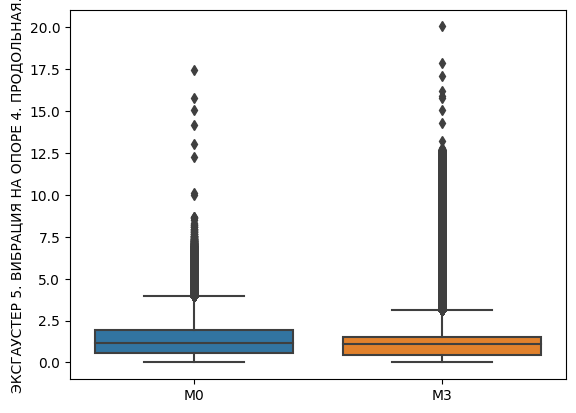

In [28]:
plot_distribution(X_train, y_train.iloc[:,2])